<a href="https://colab.research.google.com/github/2303A52222/Explainable-AI-assignment/blob/main/2303A52222_ASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1 . Feature Importance Analysis using SHAP

Columns in dataset: Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')
RMSE: 51.37674979241219
MAE: 34.01897286369833
R2: 0.7004407963784178


100%|===================| 8346/8352 [01:05<00:00]       

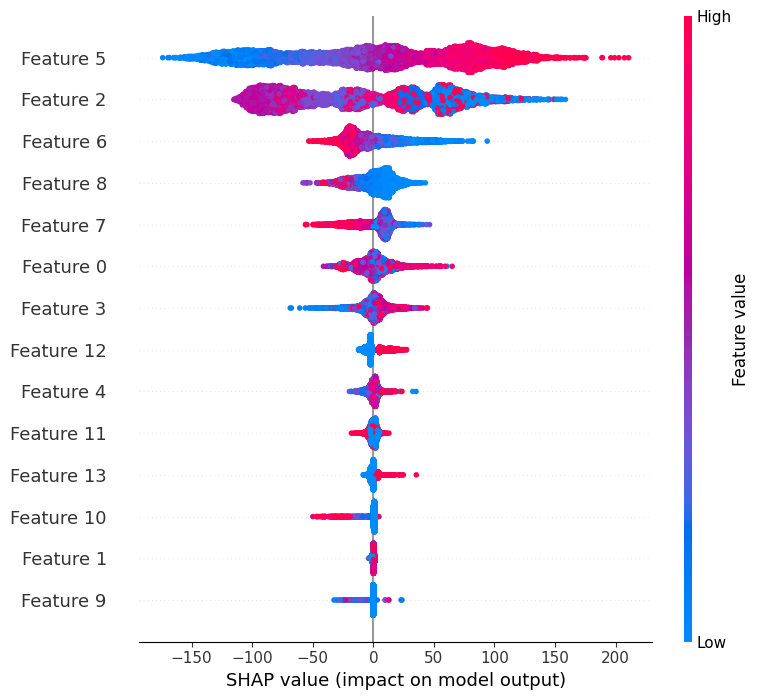

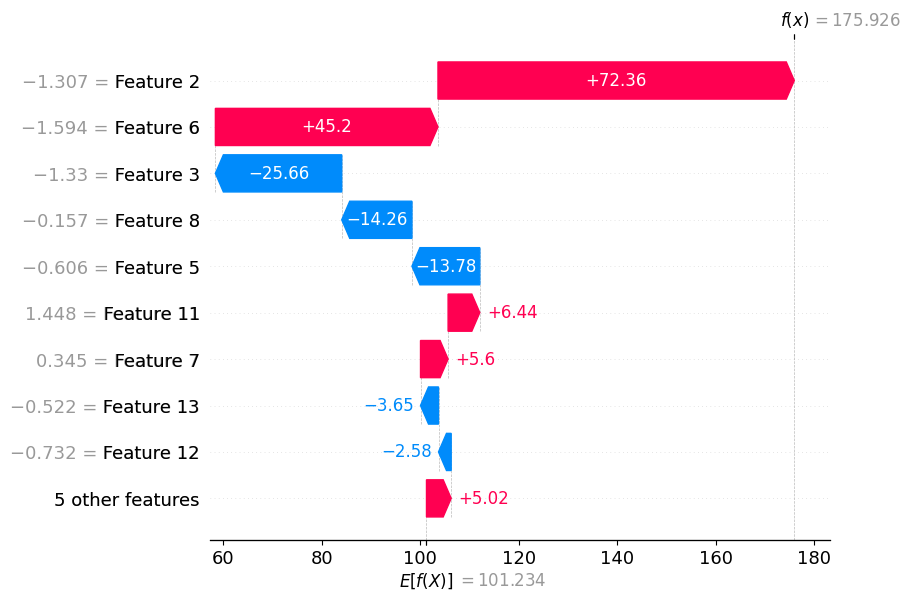

In [2]:
# Install dependencies if not installed
# !pip install pandas numpy scikit-learn xgboost shap matplotlib joblib

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# -------------------------
# 1. Load Dataset
# -------------------------
# Replace with your actual dataset filename (example: "PRSA_data.csv")
DATA_PATH = "/content/PRSA_data_2010.1.1-2014.12.31.csv"

df = pd.read_csv(DATA_PATH)
print("Columns in dataset:", df.columns)

# Target column (adjust if needed)
target_col = "pm2.5" if "pm2.5" in df.columns else "PM2.5"

# Drop missing target
df = df.dropna(subset=[target_col])

# -------------------------
# 2. Preprocessing
# -------------------------
X = df.drop(columns=[target_col])
y = df[target_col]

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Impute numeric missing values
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# -------------------------
# 3. Train/Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 4. Model Training (XGBoost)
# -------------------------
model = xgb.XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, objective="reg:squarederror")
model.fit(X_train, y_train)

# -------------------------
# 5. Evaluation
# -------------------------
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# -------------------------
# 6. SHAP Analysis
# -------------------------
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, show=True)

# Waterfall plot for one prediction
shap.plots.waterfall(shap_values[0])
